## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = plt.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)

# cv2.destroyAllWindows()

## And so on and so forth...

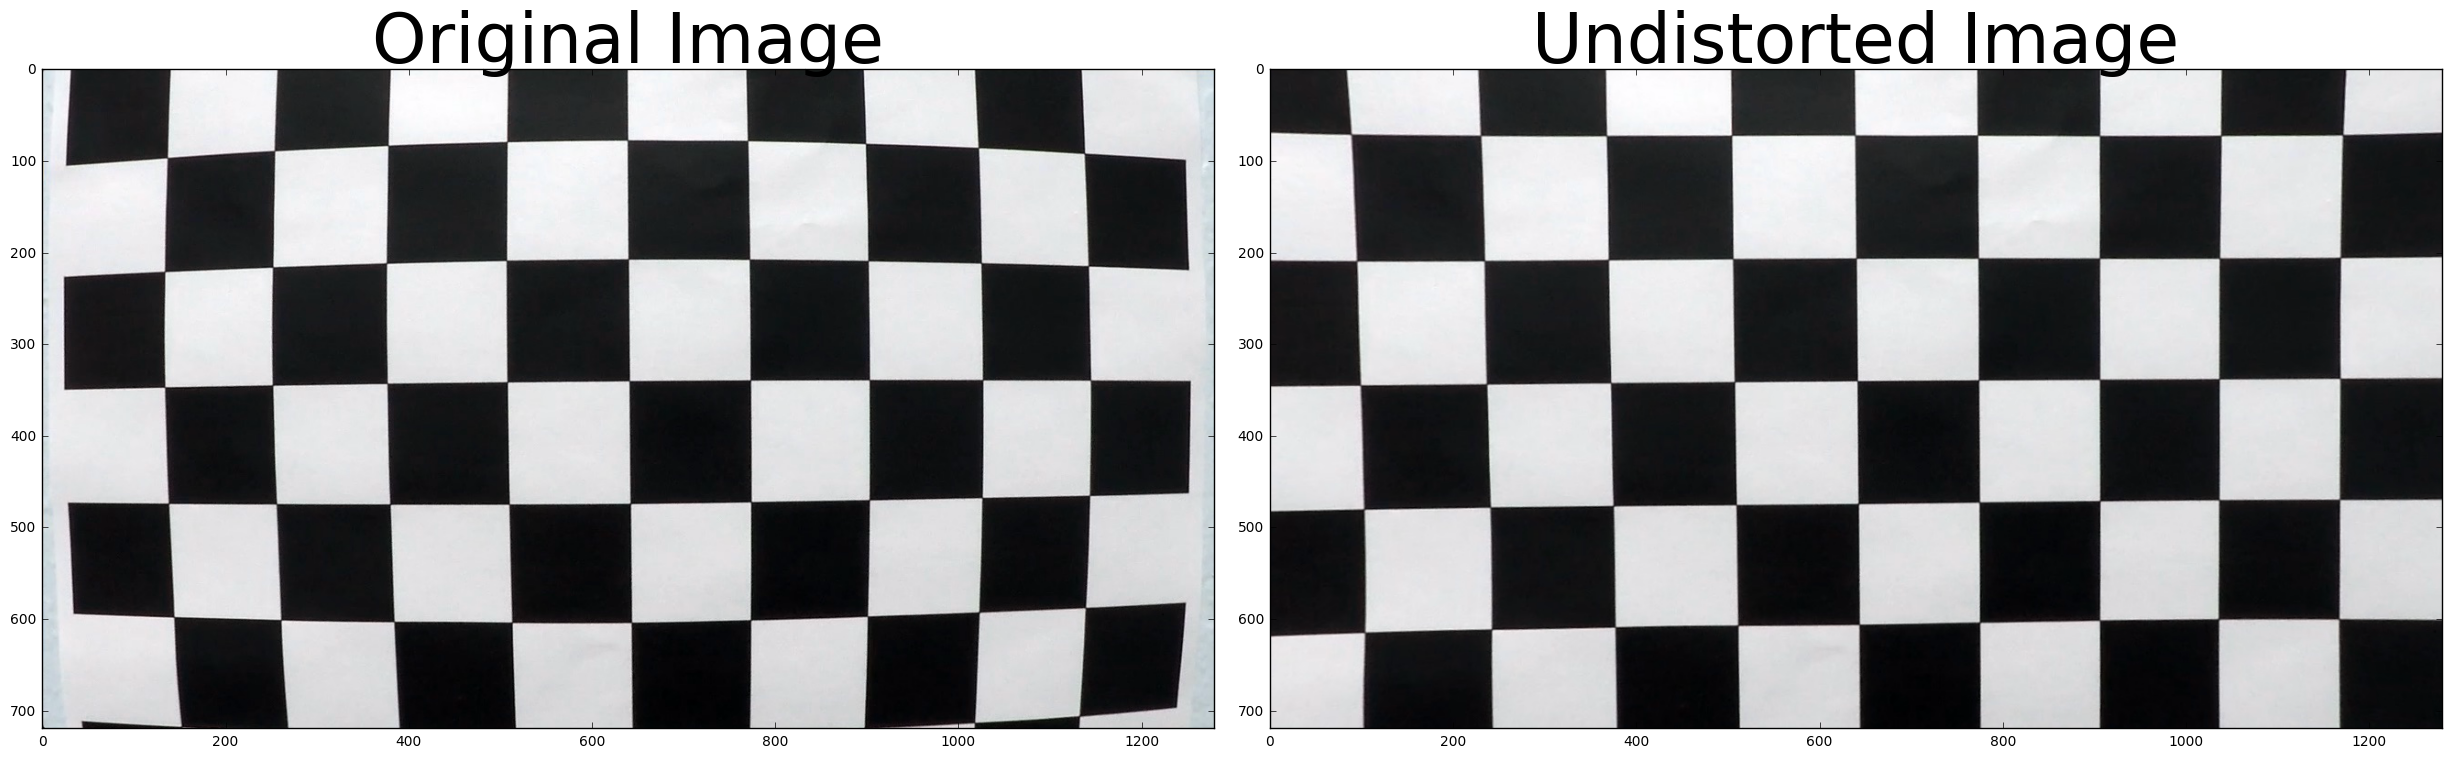

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def cam_calibration(img,objpts,imgpts):
    return cv2.calibrateCamera(objpts, imgpts, np.shape(img)[0:2], None, None)
def cal_undistort(img, mtx,dist):
    # Use cv2.calibrateCamera and cv2.undistort()
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    #undist = np.copy(img)  # Delete this line
    return undist
# Read in an image
img = cv2.imread(images[0])
ret, mtx, dist, rvecs, tvecs = cam_calibration(img,objpoints,imgpoints)


# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image


undistorted = cal_undistort(img, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 1280, 3)


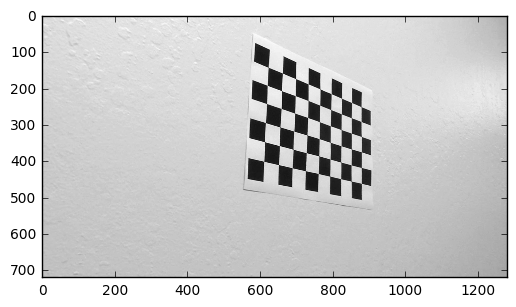

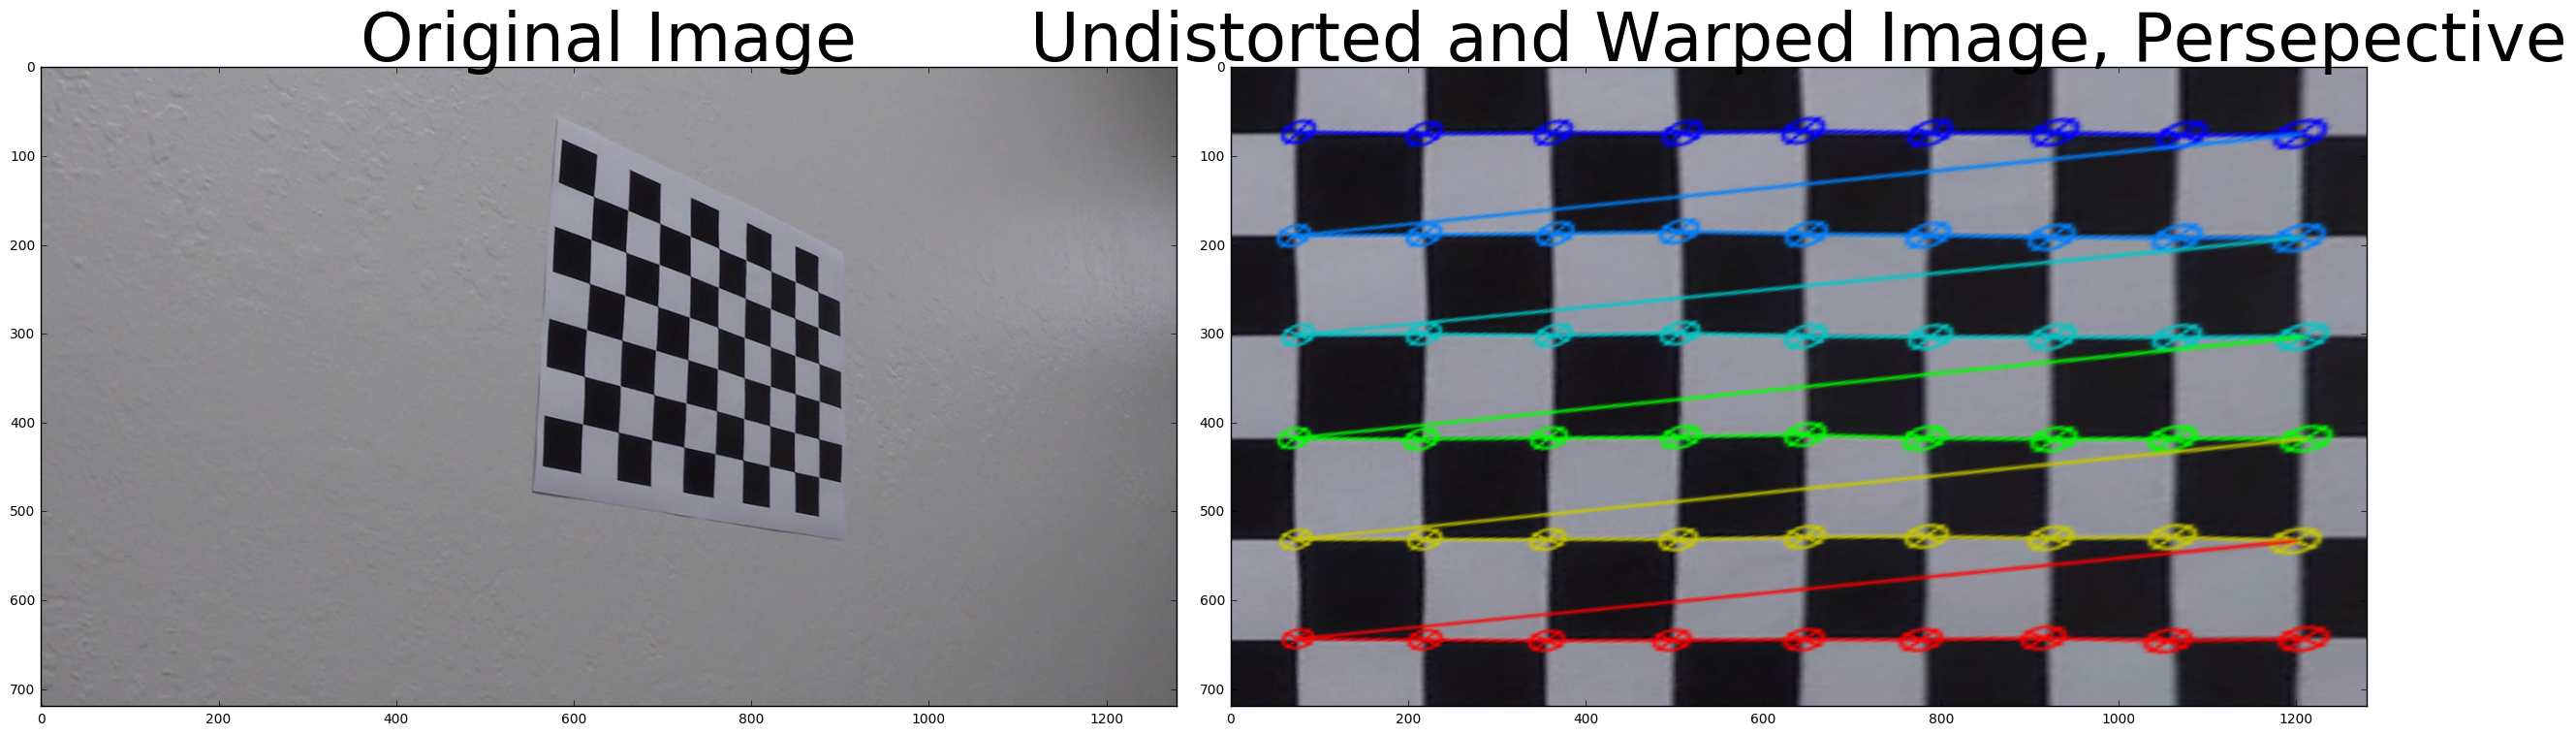

In [3]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()

# Read in an image
img = plt.imread(images[-1])
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def cam_calibration(img,objpts,imgpts):
    return cv2.calibrateCamera(objpts, imgpts, np.shape(img)[0:2], None, None)

def cal_undistort(img, mtx,dist):
    # Use cv2.calibrateCamera and cv2.undistort()
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    #undist = np.copy(img)  # Delete this line
    return undist

def corners_unwarp(img, nx, ny,mtx,dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist_img = cal_undistort(img, mtx, dist)

    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray,cmap="gray")
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if(ret):
        # a) draw corners
        margin = 75.0
        undist_img_draw = cv2.drawChessboardCorners(undist_img, (nx, ny), corners, ret)
        #Generic corner identification
        src = np.float32( [
                [corners[nx-1][0][0]     , corners[nx-1][0][1]     ],
                [corners[nx*ny-1][0][0]  , corners[nx*ny-1][0][1]  ],
                [corners[nx*ny-nx][0][0] , corners[nx*ny-nx][0][1] ],
                [corners[0][0][0]        , corners[0][0][1]        ]
                ]  )  
        width = undist_img_draw.shape[1]
        height = undist_img_draw.shape[0]
        dst = np.float32([  
            [width-margin,    margin        ],
            [width-margin ,   height-margin ],
            [margin       ,   height-margin ],
            [margin       ,   margin        ]
                 
                 
                 ])
        M = cv2.getPerspectiveTransform(src,dst)
        img_size = np.shape(undist_img_draw)[0:2]
        im_s = (img_size[1],img_size[0])
#         print(img_size)
#         print(im_s)
        warped = cv2.warpPerspective(undist_img_draw,M,im_s, flags=cv2.INTER_LINEAR) 
    print(np.shape(warped))
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny,mtx,dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image, Persepective', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [4]:
# img = cv2.imread(images[-1])
# img_size = np.shape(undist_img)[0:2]
# im_s = (img_size[1],img_size[0])
# undist_img = cal_undistort(img, objpoints, imgpoints)
# plt.imshow(cv2.warpPerspective(undist_img,perspective_M,im_s, flags=cv2.INTER_LINEAR))

In [140]:

def pipeline(img, s_thresh=(20, 100), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    l_channel = hsv[:,:,0]
    s_channel = hsv[:,:,0]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls_img = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    s_img = hls_img[:,:,2]
    binary_output = np.zeros_like(s_img)
    # 3) Return a binary image of threshold result
    binary_output[(s_img>thresh[0]) & (s_img<=thresh[1])]=1
    #binary_output = np.copy(img) # placeholder line
    return binary_output

def get_hist(img):
    histogram = np.sum(img[img.shape[0]/2:,:], axis=0)
    return histogram
prev_leftx = []
prev_rightx = []
prev_lefty = []
prev_righty = []
def poly_fit(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
    #     cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    #     cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]

    
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    #     print(lefty)
    global prev_rightx
    global prev_leftx
    global prev_righty
    global prev_lefty
    if(len(leftx)) == 0:
        leftx = prev_leftx
        lefty = prev_lefty
    else:
        prev_leftx = leftx
        prev_lefty = lefty 
    if(len(rightx)) == 0:
        rightx = prev_rightx
        righty = prev_righty
    else:
        prev_rightx = rightx
        prev_righty = righty
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    

   

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    return out_img,left_fit,right_fit

def highlight(img):
    hsvimg = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([20, 120, 120])
    upper_yellow = np.array([30, 255, 255])

    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 255, 255])

    #0, 0, 200
    #180, 255, 255
    # Threshold the HSV image to get only yellow colors
    maskhsv = cv2.inRange(hsvimg, lower_yellow, upper_yellow)
    maskwhite_hsv = cv2.inRange(hsvimg,lower_white,upper_white)

    # Bitwise-AND mask and original image
    res_yellow = cv2.bitwise_and(img,img, mask= maskhsv)
    res_white = cv2.bitwise_and(img,img, mask= maskwhite_hsv)
    res = cv2.bitwise_or(res_yellow,res_white)
    return res

In [176]:
from os import listdir
from os.path import isfile, join

def process_image(img):
#     print(np.shape(img))
    fi, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(24, 9),sharex=True)
    fi.tight_layout()
    img = cal_undistort(img,mtx,dist)
    img_size = np.shape(img)[0:2]
    M = cv2.getPerspectiveTransform(src,dst)
    im_s = (img_size[1],img_size[0])
    for_hsv_img = cv2.warpPerspective(img,M,im_s, flags=cv2.INTER_LINEAR)
    
    ax1.imshow(for_hsv_img)
    
    M_inverse = cv2.getPerspectiveTransform(dst,src)
    
    #hls_img = #hls_select(highlight(img), thresh=(10, 255))
    #hls_img = hls_select(highlight(img),thresh=(80,255))
    hls_img = highlight(img)
    warped = cv2.warpPerspective(hls_img,M,im_s, flags=cv2.INTER_LINEAR)
    histogram = get_hist(warped)
    ax2.plot(histogram)
    
    ax3.imshow(warped,cmap="gray")
    
    out_img2,left_fit,right_fit = poly_fit(warped)    
    #choose the best polyfit 
#     lef = histogram[:len(histogram)/2]
#     rig = histogram[len(histogram)/2:]
#     if(np.std(lef) > np.std(rig)):
#         c = right_fit[2]
#         right_fit = np.copy(left_fit)
#         right_fit[2] = c
#     else:
#         c = left_fit[2]
#         left_fit = np.copy(right_fit)
#         left_fit[2] = c
#     pl = np.zeros_like(warped)
    
    
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    ax4.imshow(out_img2)
#     points = []
#     for i,j in zip(left_fitx,ploty):
#         points.append([i,j])
#     plt.imshow(cv2.polylines(for_hsv_img,np.int32([points]), 2, (0,255,255)))
#     points = []
#     for i,j in zip(right_fitx,ploty):
#         points.append([i,j])
#     plt.imshow(cv2.polylines(for_hsv_img,np.int32([points]), 2, (0,255,255)))
        
    ax4.plot(left_fitx, ploty, color='yellow')
    ax4.plot(right_fitx, ploty, color='yellow')
    plt.show()
#     out_inverse = cv2.warpPerspective(ax4.plot(),M_inverse,im_s, flags=cv2.INTER_LINEAR)
#     plt.imshow(out_inverse)
#     ax4.xlim(0, 1280)
#     ax4.ylim(720, 0)
    fi.canvas.draw()

    # Now we can save it to a numpy array.
    data = np.fromstring(fi.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    result = data.reshape(fi.canvas.get_width_height()[::-1] + (3,))
    return result
class Line():
    def __init__(self,l,r):
        self.left =self.prev_left= l
        self.right =self.prev_right= r
    def update_prev(self,l,r):
        
        self.left = 0.05*self.left + 0.95 * self.prev_left
        self.right = 0.05*self.right + 0.95 * self.prev_right
        self.prev_right = r
        self.prev_left = l
        
new_line = None

def process_image_final(img):
    image = img
#     gradx = abs_sobel_thresh(image, orient='x', thresh = [10,250])
#     mag_binary = mag_thresh(image, sobel_kernel=15, mag_thresh=(100, 200))
#     dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(np.pi/1, np.pi/2))
#     combined = np.zeros_like(dir_binary)
#     combined[((gradx == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
#     print(np.shape(img))
    image = cal_undistort(image,mtx,dist)
    
    
    img_size = np.shape(img)[0:2]
    M = cv2.getPerspectiveTransform(src,dst)
    im_s = (img_size[1],img_size[0])
    for_hsv_img = cv2.warpPerspective(image,M,im_s, flags=cv2.INTER_LINEAR)
    
    
    M_inverse = cv2.getPerspectiveTransform(dst,src)
    
    hls_img = hls_select(highlight(image), thresh=(10, 255))
#     filtered = combined
#     hls_img = combined #hls_select(filtered,thresh=(100,255))
    
    warped = cv2.warpPerspective(hls_img,M,im_s, flags=cv2.INTER_LINEAR)
    histogram = get_hist(warped)
    
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    out_img2,left_fit,right_fit = poly_fit(warped)  
        #choose the best polyfit 
    lef = histogram[:len(histogram)/2]
    rig = histogram[len(histogram)/2:]
    if(np.std(lef) > np.std(rig)):
        c = right_fit[2]
        m = right_fit[1]
        right_fit = np.copy(left_fit)
        right_fit[2] = c
        right_fit[1] = m
    else:
        c = left_fit[2]
        m= left_fit[1]
        left_fit = np.copy(right_fit)
        left_fit[2] = c
        left_fit[1] = m
    pl = np.zeros_like(warped)
    
    global new_line
    if(new_line == None):
        new_line = Line(left_fit,right_fit)
        new_line.update_prev(left_fit,right_fit)
    else:
        new_line.update_prev(left_fit,right_fit)
    right_fix = new_line.right
    left_fix = new_line.left
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    window_img = np.zeros_like(out_img2)
    
     # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx -margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
#     plt.imshow(cv2.warpPerspective(for_hsv_img,M_inverse,im_s, flags=cv2.INTER_LINEAR))
#     plt.show()

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    window_img_warp = cv2.warpPerspective(window_img,M_inverse,im_s, flags=cv2.INTER_LINEAR)
#     print(np.shape(img))
#     print(np.shape(window_img_warp))
    result = cv2.addWeighted(image, 1, window_img_warp, 0.3, 0)
    
    new_war = np.dstack((warped, warped, warped))*255
    #result = 
    stacked = np.hstack((image,result))
    
    return stacked
    

src = np.float32([
    [585.0, 460.0],
    [203.0, 720.0],
    [1127, 720],
    [695, 460]
])

dst = np.float32([
    [270, 50],
    [270, 670 ],
    [910, 670 ],
    [910, 50 ]
])

from moviepy.editor import VideoFileClip
from IPython.display import HTML
clip1 = VideoFileClip("./Second.mp4")

white_clip = clip1.fl_image(process_image_final)

# onlyfiles = glob.glob("../test_images/*.jpg")
# for each in onlyfiles:
#     image = plt.imread(each)
#     plt.imshow(process_image_final(image))
#     plt.show()

    

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

In [177]:
# Change perspective
# HSL on the HSV highlighted image
# Poly fit
# change perspective back

In [178]:
white_output="./first.mp4"
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video ./first.mp4
[MoviePy] Writing video ./first.mp4


100%|█████████▉| 720/721 [02:06<00:00,  5.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./first.mp4 

CPU times: user 3min 10s, sys: 14.7 s, total: 3min 24s
Wall time: 2min 10s


In [78]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [99]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result

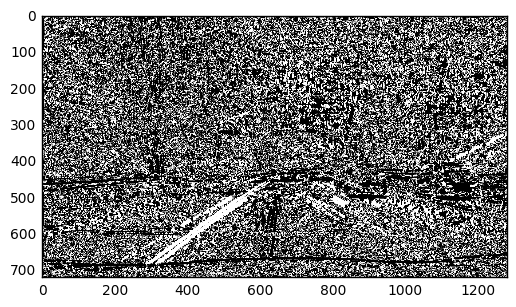

In [101]:
plt.imshow(dir_binary,cmap="gray")

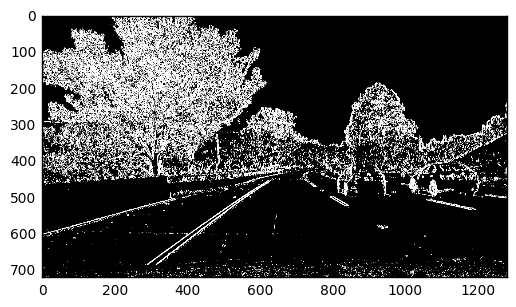

In [156]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    gradx = 1 if orient == 'x' else 0
    grady = 1 if orient == 'y' else 0
    sobel = cv2.Sobel(gray, cv2.CV_64F, gradx, grady)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8( 255 * abs_sobel / np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    
    
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return binary_output

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(direction)
    
    binary_output[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    return binary_output

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements
hls = cv2.cvtColor(highlight(image), cv2.COLOR_RGB2GRAY)
#Undistort 

gradx = abs_sobel_thresh(image, orient='x', thresh = [10,250])
mag_binary = mag_thresh(image, sobel_kernel=15, mag_thresh=(100, 200))
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(np.pi/1, np.pi/2))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined,cmap="gray")

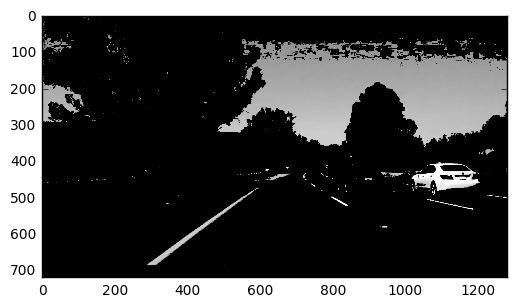

In [125]:
plt.imshow(hls,cmap="gray")